# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /root/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c birdclef-2022

100% 6.09G/6.12G [00:45<00:00, 131MB/s]
100% 6.12G/6.12G [00:45<00:00, 145MB/s]


In [4]:
!unzip -qq birdclef-2022.zip

# Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# For exploring audio files
import librosa
import librosa.display
import IPython.display as ipd

%matplotlib inline

BASE_DIR = '.'
train = pd.read_csv(f'{BASE_DIR}/train_metadata.csv')
test = pd.read_csv(f'{BASE_DIR}/test.csv')
ebird = pd.read_csv(f'{BASE_DIR}/eBird_Taxonomy_v2021.csv')
ss = pd.read_csv(f'{BASE_DIR}/sample_submission.csv')

# Code

In [6]:
# Listen to the audio for the second training example
fn = train["filename"].values[5]
ipd.display(ipd.Audio(f"{BASE_DIR}/train_audio/{fn}"))

Length of the recording = 3.5 sec


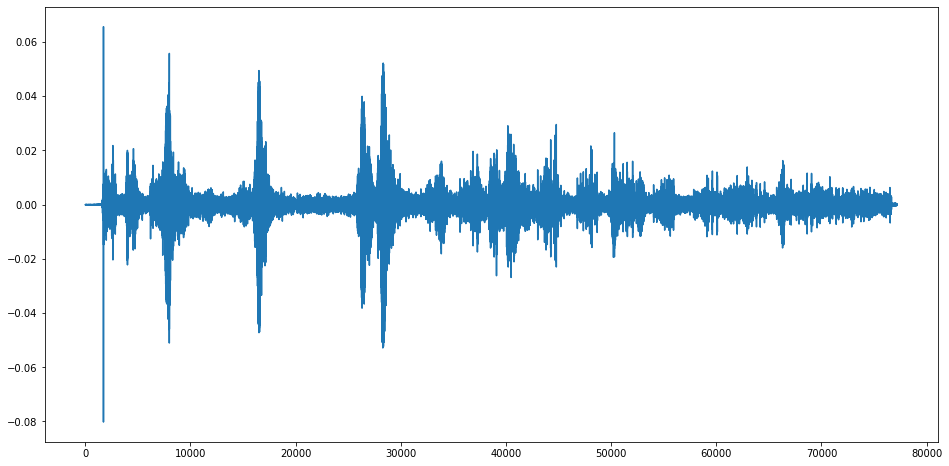

In [7]:
wave, sr = librosa.load(f"{BASE_DIR}/train_audio/{fn}")
fig, ax = plt.subplots(figsize=(16, 8))
print(f"Length of the recording = {round(len(wave)/sr, 3)} sec")
ax.plot(np.arange(len(wave)), wave);

In [28]:
# D = librosa.stft(wave)
# img = librosa.amplitude_to_db(D)

# fig, ax = plt.subplots(figsize=(16, 8))
# ax.imshow(img);

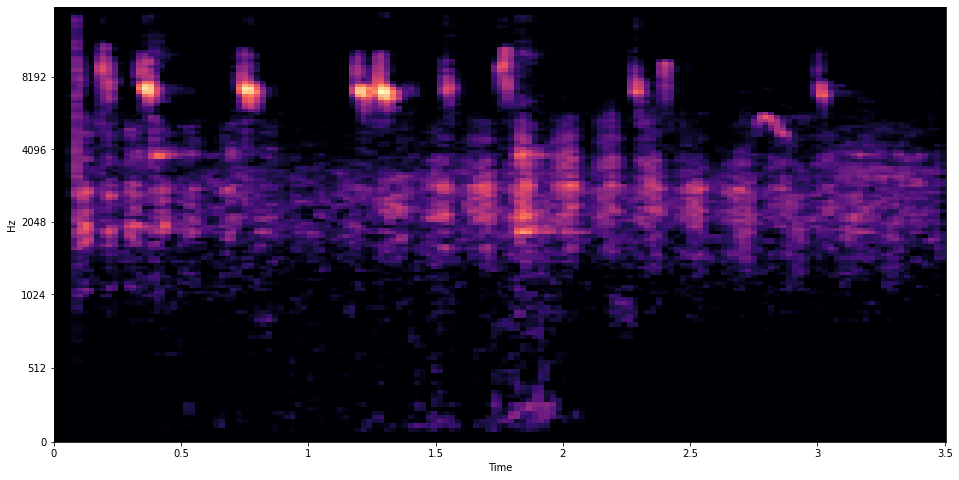

In [9]:
melspec = librosa.feature.melspectrogram(y=wave, sr=sr)
s_db = librosa.amplitude_to_db(melspec, ref=np.max)

fig, ax = plt.subplots(figsize=(16, 8))
colormesh = librosa.display.specshow(
        s_db,
        sr=sr,
        x_axis="time",
        y_axis="mel",
        fmin=0,
        fmax=16000,
        ax=ax,
    )

# ax.imshow(img);

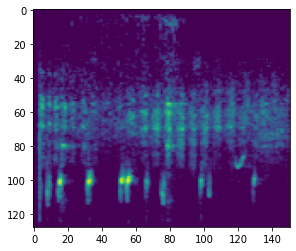

In [27]:
plt.imshow(s_db);

In [29]:
s_db

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

# OGG to img matrix function

In [31]:
def ogg_to_img(full_path):
    wave, sr = librosa.load(full_path)
    melspec = librosa.feature.melspectrogram(y=wave, sr=sr)
    return librosa.amplitude_to_db(melspec, ref=np.max).data

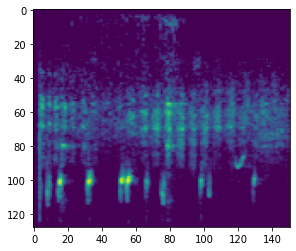

In [32]:
fn = train["filename"].values[5]
img = ogg_to_img(f"{BASE_DIR}/train_audio/{fn}")
plt.imshow(img)